In [1]:
import pandas as pd

ratings = pd.read_csv("cleaned_ratings.csv")
movies = pd.read_csv("cleaned_movies.csv")


In [2]:
df = ratings.merge(movies, on="MovieID", how="left")

In [3]:
df.info

<bound method DataFrame.info of           MovieID   UserID  Rating        Date    Year            Title
0               1  1488844     3.0  2005-09-06  2003.0  Dinosaur Planet
1               1   822109     5.0  2005-05-13  2003.0  Dinosaur Planet
2               1   885013     4.0  2005-10-19  2003.0  Dinosaur Planet
3               1    30878     4.0  2005-12-26  2003.0  Dinosaur Planet
4               1   823519     3.0  2004-05-03  2003.0  Dinosaur Planet
...           ...      ...     ...         ...     ...              ...
24053759     4499  2591364     2.0  2005-02-16  2002.0       In My Skin
24053760     4499  1791000     2.0  2005-02-10  2002.0       In My Skin
24053761     4499   512536     5.0  2005-07-27  2002.0       In My Skin
24053762     4499   988963     3.0  2005-12-20  2002.0       In My Skin
24053763     4499  1704416     3.0  2004-06-02  2002.0       In My Skin

[24053764 rows x 6 columns]>

In [15]:
df.head()

,MovieID,UserID,Rating,Date,Year,Title
0,1,1488844,3.0,2005-09-06,2003,Dinosaur Planet
1,1,822109,5.0,2005-05-13,2003,Dinosaur Planet
2,1,885013,4.0,2005-10-19,2003,Dinosaur Planet
3,1,30878,4.0,2005-12-26,2003,Dinosaur Planet
4,1,823519,3.0,2004-05-03,2003,Dinosaur Planet


In [8]:
df.isnull().sum()

MovieID         0
UserID          0
Rating          0
Date            0
Year       246548
Title      246548
dtype: int64

In [7]:
df["Year"] = df["Year"].astype("Int32")


In [9]:
df.dropna(inplace= True)

In [10]:
df.isnull().sum()

MovieID    0
UserID     0
Rating     0
Date       0
Year       0
Title      0
dtype: int64

In [11]:
df.info

<bound method DataFrame.info of           MovieID   UserID  Rating        Date  Year            Title
0               1  1488844     3.0  2005-09-06  2003  Dinosaur Planet
1               1   822109     5.0  2005-05-13  2003  Dinosaur Planet
2               1   885013     4.0  2005-10-19  2003  Dinosaur Planet
3               1    30878     4.0  2005-12-26  2003  Dinosaur Planet
4               1   823519     3.0  2004-05-03  2003  Dinosaur Planet
...           ...      ...     ...         ...   ...              ...
24053759     4499  2591364     2.0  2005-02-16  2002       In My Skin
24053760     4499  1791000     2.0  2005-02-10  2002       In My Skin
24053761     4499   512536     5.0  2005-07-27  2002       In My Skin
24053762     4499   988963     3.0  2005-12-20  2002       In My Skin
24053763     4499  1704416     3.0  2004-06-02  2002       In My Skin

[23807216 rows x 6 columns]>

In [12]:
len(df)

23807216

In [13]:
df["MovieID"].nunique()


4413

In [14]:
df["UserID"].nunique()


470671

In [17]:
df.head()

,MovieID,UserID,Rating,Date,Year,Title
0,1,1488844,3.0,2005-09-06,2003,Dinosaur Planet
1,1,822109,5.0,2005-05-13,2003,Dinosaur Planet
2,1,885013,4.0,2005-10-19,2003,Dinosaur Planet
3,1,30878,4.0,2005-12-26,2003,Dinosaur Planet
4,1,823519,3.0,2004-05-03,2003,Dinosaur Planet


In [18]:
df.duplicated().sum()


np.int64(0)

In [19]:
df.drop_duplicates(inplace=True)


In [20]:
df["Rating"].unique()


array([3., 5., 4., 2., 1.])

In [24]:
df["Date"].min()

'1999-11-11'

In [23]:
df["Date"].max()

'2005-12-31'

In [26]:
df["Year"].describe()

count     23807216.0
mean     1994.508083
std        12.544528
min           1915.0
25%           1991.0
50%           1999.0
75%           2003.0
max           2005.0
Name: Year, dtype: Float64

In [27]:
duplicates = df.duplicated(subset=["UserID", "MovieID"]).sum()
duplicates


np.int64(0)

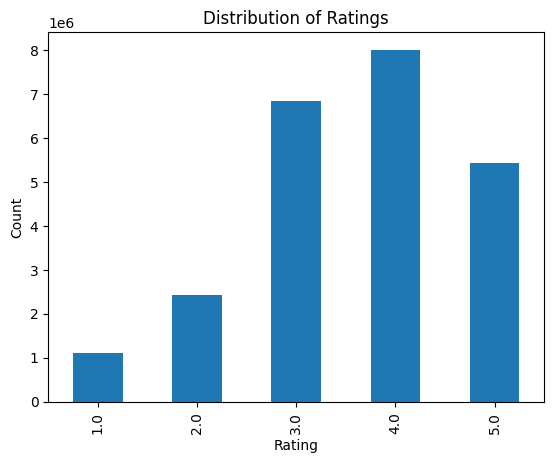

In [28]:
# Rating Behavior Analysis
import matplotlib.pyplot as plt

df["Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [40]:
#
print("mean is ;", df["Rating"].mean())
print("median is ; ",df["Rating"].median())
print("std is ; ",df["Rating"].std())

mean is ; 3.5968985621838354
median is ;  4.0
std is ;  1.085832241847531


In [37]:
# Movie Popularity Analysis
movie_counts = df.groupby("Title")["Rating"].count().sort_values(ascending=False)
movie_counts.head(10)


Title
Pirates of the Caribbean: The Curse of the Black Pearl    193941
What Women Want                                           162597
Bruce Almighty                                            160454
The Italian Job                                           156183
American Beauty                                           154832
Shrek 2                                                   153996
The Sixth Sense                                           151292
Lord of the Rings: The Fellowship of the Ring             149866
50 First Dates                                            145519
Finding Nemo (Widescreen)                                 140979
Name: Rating, dtype: int64

In [45]:
# High-Quality Movies
movie_stats = df.groupby("Title").agg(
    AvgRating=("Rating", "mean"),
    TotalRatings=("Rating", "count")
)

popular = movie_stats[movie_stats["TotalRatings"] > 1000]
popular.sort_values("AvgRating", ascending=False).head(10)


,AvgRating,TotalRatings
Title,,
Lost: Season 1,4.670989,7249
The Simpsons: Season 6,4.581296,8426
Inu-Yasha,4.554434,1883
Family Guy: Freakin' Sweet Collection,4.516007,10027
The West Wing: Season 3,4.473692,6633
Six Feet Under: Season 4,4.469693,11829
Samurai Champloo,4.467500,2000
Stargate SG-1: Season 8,4.461921,1812
Gilmore Girls: Season 3,4.448333,4829


In [46]:
# Most Active Users
df["UserID"].value_counts().head(10)


UserID
305344     4381
387418     4336
2439493    4114
1664010    3939
2118461    3695
1639792    2442
1314869    2433
1461435    2398
1932594    2229
2606799    2201
Name: count, dtype: int64

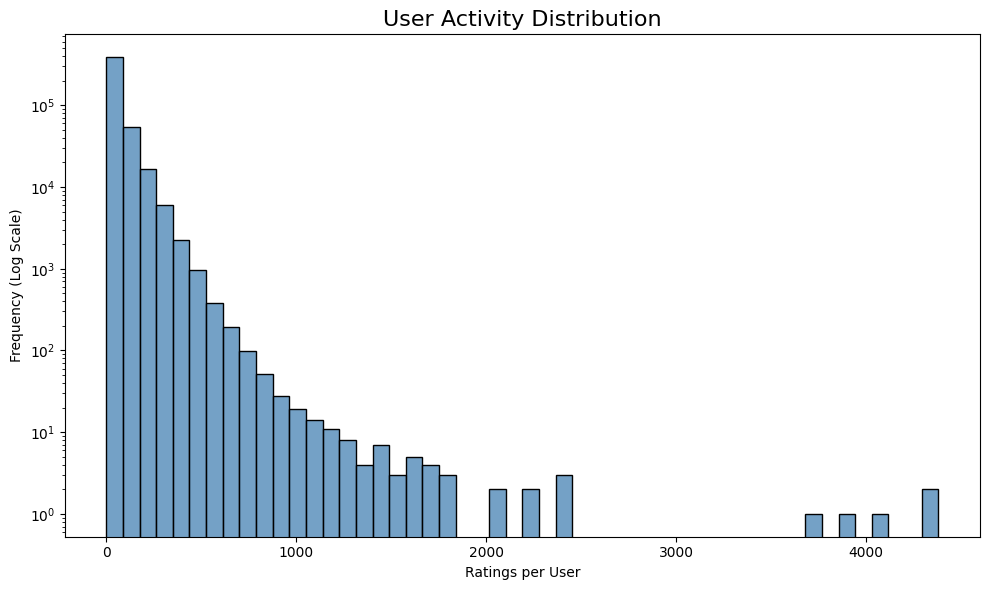

In [51]:
# Distribution of Ratings per User
import seaborn as sns

plt.figure(figsize=(10,6))

sns.histplot(user_activity, bins=50, color="steelblue")

plt.yscale("log")
plt.title("User Activity Distribution", fontsize=16)
plt.xlabel("Ratings per User")
plt.ylabel("Frequency (Log Scale)")

plt.tight_layout()
plt.show()



In [56]:
movie_stats["TotalRatings"].corr(movie_stats["AvgRating"])


np.float64(0.23739555175345725)

/var/folders/pc/jshp7p552r753j_fljl2xv500000gn/T/ipykernel_1960/4188273741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="Blues")


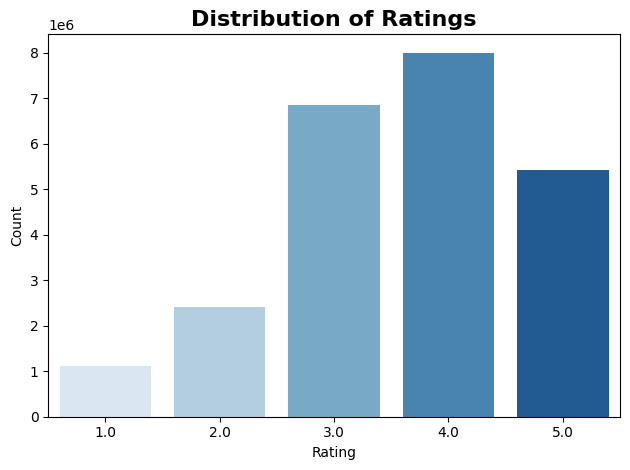

In [58]:
# Rating Distribution (Bar Plot)
sns.countplot(x="Rating", data=df, palette="Blues")

plt.title("Distribution of Ratings", fontsize=16, weight="bold")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


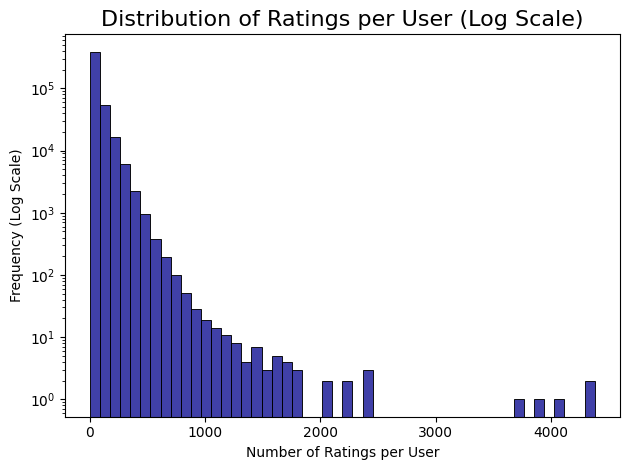

In [60]:
# User Activity Distribution (Log Scale)
user_activity = df["UserID"].value_counts()

sns.histplot(user_activity, bins=50, color="darkblue")

plt.yscale("log")
plt.title("Distribution of Ratings per User (Log Scale)", fontsize=16)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Frequency (Log Scale)")
plt.tight_layout()
plt.show()
